Import Library

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Numerical column imputation(Titanic datasets)

In [133]:
df = pd.read_csv('/content/titanic_datasets.csv',usecols=['Age' , 'Fare' , 'Survived'])
df.head(2)

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000


In [107]:
df.isnull().mean()*100

,0
Survived,0.000000
Age,20.574163
Fare,0.239234


In [108]:
df['Age'].skew()

np.float64(0.4573612871503845)

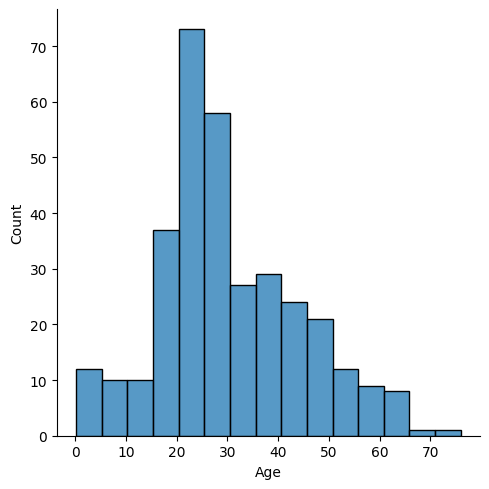

In [109]:
sns.displot(df['Age'])

In [110]:
df['Fare'].skew()

np.float64(3.6872133081121405)

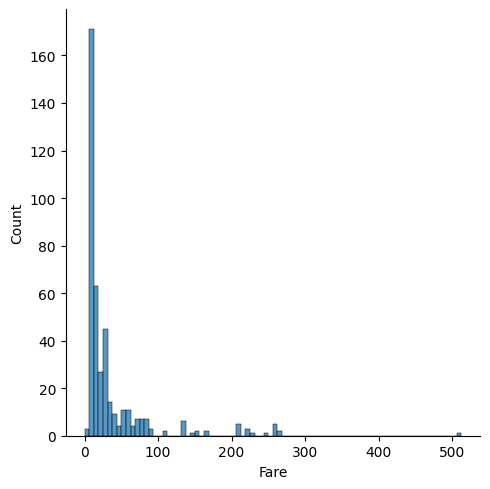

In [111]:
sns.displot(df['Fare'])

In [112]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [114]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [115]:
x_train

,Age,Fare
280,23.0,8.6625
284,2.0,20.2125
40,39.0,13.4167
17,21.0,7.2250
362,31.0,21.0000
...,...,...
299,29.0,7.8542
22,NaN,31.6833
72,29.0,7.9250
15,24.0,27.7208


In [116]:
from sklearn.impute import SimpleImputer

In [117]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

In [118]:
trf1 = ColumnTransformer([
    ('mean_imputer',mean_imputer,['Fare']),
    ('median_imputer' , median_imputer , ['Age'])
],remainder='passthrough')

In [119]:
x_train = trf1.fit_transform(x_train)
x_test  = trf1.transform(x_test)

In [120]:
x_train

array([[8.6625000e+00, 2.3000000e+01],
       [2.0212500e+01, 2.0000000e+00],
       [1.3416700e+01, 3.9000000e+01],
       [7.2250000e+00, 2.1000000e+01],
       [2.1000000e+01, 3.1000000e+01],
       [2.6000000e+01, 8.0000000e+00],
       [7.0000000e+00, 2.7000000e+01],
       [8.3158300e+01, 3.7000000e+01],
       [4.7100000e+01, 1.7000000e+01],
       [2.1000000e+01, 3.1000000e+01],
       [9.3500000e+00, 8.3000000e-01],
       [2.6550000e+01, 2.7000000e+01],
       [8.9625000e+00, 2.2000000e+01],
       [2.1679200e+01, 2.7000000e+01],
       [7.8958000e+00, 2.7000000e+01],
       [7.8542000e+00, 2.1000000e+01],
       [6.3358300e+01, 4.5000000e+01],
       [1.0500000e+01, 2.2000000e+01],
       [2.1000000e+01, 2.7000000e+01],
       [7.5792000e+00, 3.2000000e+01],
       [1.4500000e+01, 2.7000000e+01],
       [2.6000000e+01, 2.5000000e+01],
       [2.2025000e+01, 2.6000000e+01],
       [5.5441700e+01, 2.5000000e+01],
       [2.1679200e+01, 2.7000000e+01],
       [7.5241700e+01, 4.

In [121]:
trf1.named_transformers_['mean_imputer'].statistics_

array([33.66278799])

In [122]:
x_train = pd.DataFrame(
    x_train,
    columns=['Fare', 'Age']
)
x_test = pd.DataFrame(
    x_test,
    columns = ['Fare' , "Age"]
)

In [123]:
x_train

,Fare,Age
0,8.6625,23.0
1,20.2125,2.0
2,13.4167,39.0
3,7.2250,21.0
4,21.0000,31.0
...,...,...
329,7.8542,29.0
330,31.6833,27.0
331,7.9250,29.0
332,27.7208,24.0


In [125]:
x_test

,Fare,Age
0,51.8625,27.0
1,7.7958,21.0
2,12.3500,61.0
3,26.5500,64.0
4,69.5500,27.0
...,...,...
79,13.5000,24.0
80,26.0000,50.0
81,31.3875,40.0
82,28.5375,31.0


In [ ]:
x_train.isnull().sum()

Categorical column imputation

In [138]:
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day37-handling-missing-categorical-data/train.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)
df = pd.read_csv(data)

In [142]:
df = df[['FireplaceQu','GarageQual','SalePrice']]
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [143]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

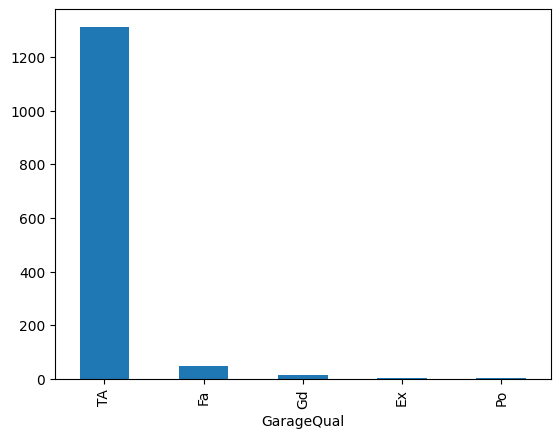

In [144]:
df['GarageQual'].value_counts().plot(kind='bar')

In [145]:
df['GarageQual'].mode()

,GarageQual
0,TA


In [146]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'])

In [147]:
from sklearn.impute import SimpleImputer

In [149]:
imputer = SimpleImputer(strategy='most_frequent')

In [151]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [152]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)